# Chapter 1 Environmental Engineering: Indoor Air quality modeling

1. [Introduction: BOD equation](#1.-Introduction)
2. [Simulation: BOD](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)

## 1. Introduction

### 🏠 Indoor Air Quality (IAQ) – Definition, Risks, and Management

**Indoor Air Quality (IAQ)** refers to the condition of air inside buildings and structures — including homes, offices, schools, and hospitals — as it affects the **health, comfort, and productivity** of occupants.

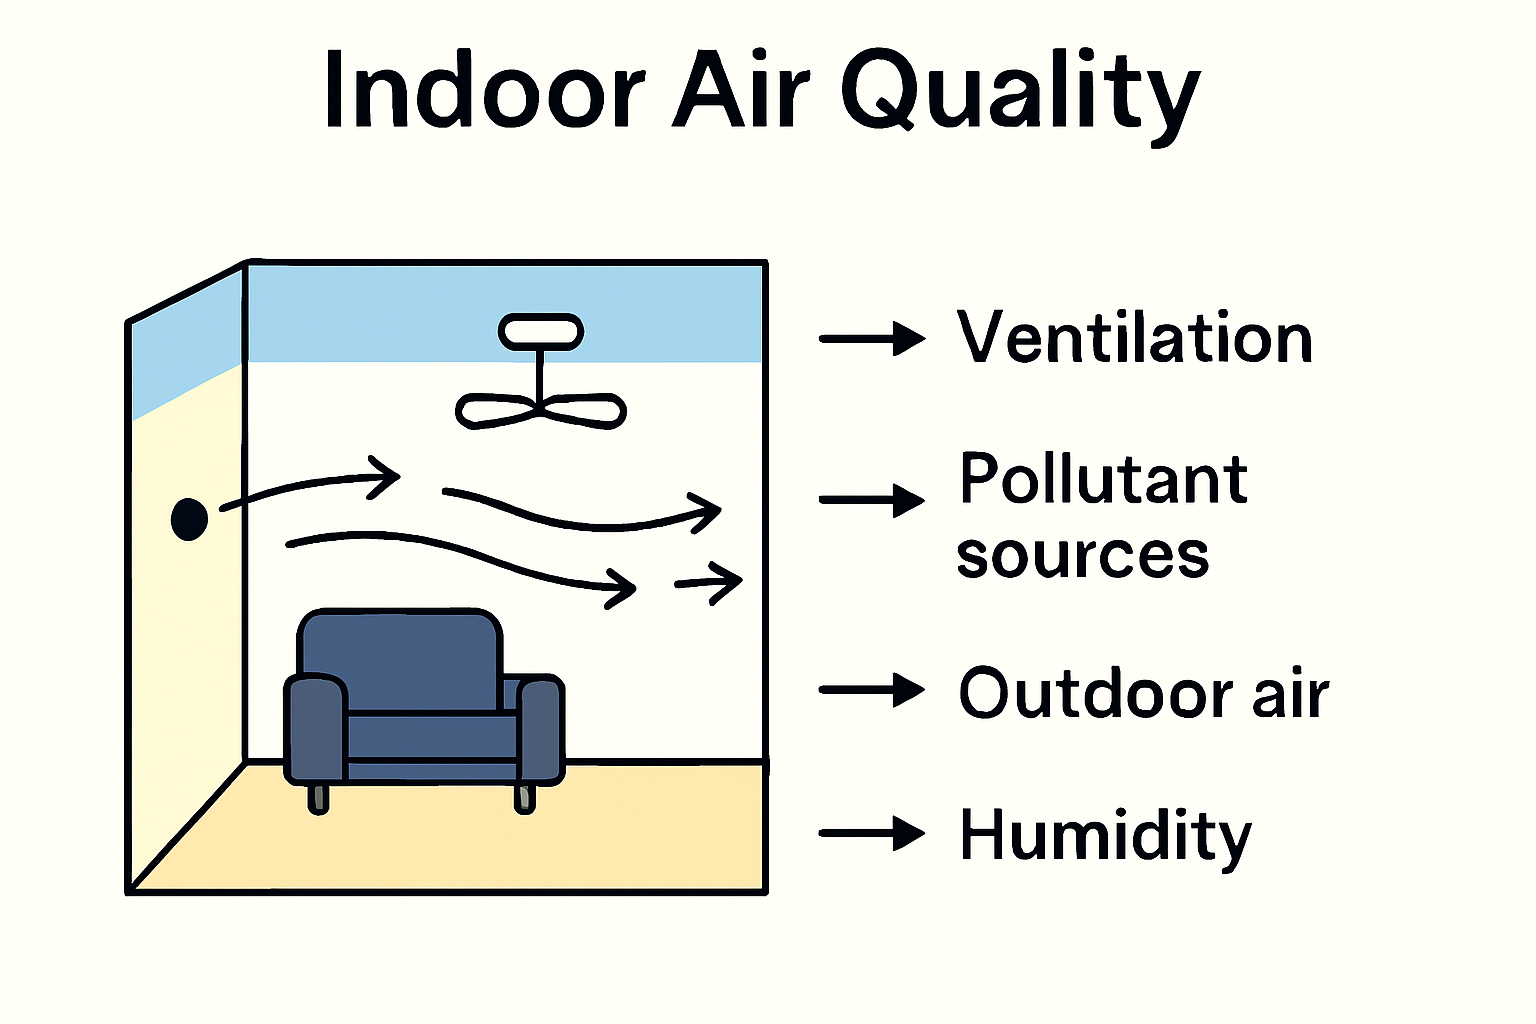


> With people spending **90%+ of their time indoors**, IAQ often poses a greater health risk than outdoor air pollution.

---

### ☣️ Key Toxic Parameters in Indoor Air

| Pollutant                  | Source Examples                          | Health Risks                             |
|----------------------------|-------------------------------------------|------------------------------------------|
| **Particulate Matter (PM2.5, PM10)** | Cooking, smoking, dust, outdoor infiltration | Respiratory and cardiovascular issues    |
| **Volatile Organic Compounds (VOCs)** | Paints, cleaning agents, furniture           | Headaches, nausea, long-term toxicity    |
| **Formaldehyde**           | Building materials, adhesives             | Eye irritation, cancer risk              |
| **Carbon Monoxide (CO)**   | Gas stoves, heaters, tobacco smoke        | Lethal at high levels, dizziness         |
| **Radon**                  | Soil gas infiltration                     | Lung cancer (radioactive gas)            |
| **Nitrogen Dioxide (NO₂)** | Combustion appliances                     | Asthma, respiratory inflammation         |
| **Mold & Biological Agents**| Humidity, poor ventilation                | Allergies, infections                    |

---

### 🔍 Factors Influencing IAQ

| Category              | Examples                                      |
|-----------------------|-----------------------------------------------|
| **Building Design**   | Ventilation rate, airtightness, HVAC systems  |
| **Occupant Behavior** | Smoking, cooking, cleaning habits             |
| **Outdoor Air Quality**| Pollutant infiltration from traffic or industry |
| **Materials & Furnishings**| Off-gassing from carpets, paints, furniture |
| **Moisture & Humidity**| Promotes mold and microbial growth           |
| **Maintenance**       | Filter changes, duct cleaning, leak repairs   |

---

### 🧮 How IAQ Is Modeled

| Approach               | Description                                  | Use Case                                |
|------------------------|----------------------------------------------|------------------------------------------|
| **Box Models**         | Simplified mass balance of pollutants        | Quick IAQ screening                      |
| **CFD Models**         | Computational Fluid Dynamics for airflow     | Detailed design and ventilation analysis |
| **Exposure Models**    | Estimate occupant exposure over time         | Health risk assessment                   |
| **Sensor Networks**    | Real-time monitoring and feedback            | Smart building management                |

> Modeling helps predict pollutant concentrations, optimize ventilation, and assess health risks under different scenarios.

### Governing Equation: Mass Balance Model (CSTR)

The model assumes a well-mixed indoor space and applies the following differential equation:


$$
\frac{dC}{dt} = \frac{E}{V} - \left( \frac{Q}{V} + k \right) C
$$

Where:
- $( C(t) $): pollutant concentration at time \( t \) (mg/m³)  
- $( E $): emission rate (mg/hr)  
- $( V $): room volume (m³)  
- $( Q $): ventilation rate (m³/hr)  
- $( k $): decay rate (1/hr), representing filtration or chemical decay  
- $( \frac{Q}{V} $): air exchange rate (1/hr)

This equation balances pollutant input from emissions and removal via ventilation and decay.

---


### 🛠️ How to Control and Manage IAQ

| Strategy               | Examples                                      |
|------------------------|-----------------------------------------------|
| **Source Control**     | Low-VOC materials, no smoking, sealed radon entry |
| **Ventilation**        | Natural or mechanical systems, air exchange   |
| **Filtration**         | HEPA filters, activated carbon, air purifiers |
| **Humidity Control**   | Dehumidifiers, leak repair, moisture barriers |
| **Monitoring**         | CO₂ sensors, VOC meters, PM detectors         |
| **Design Integration** | IAQ planning during building design phase     |

---

### 📌 Insight

> Indoor air quality is a **critical public health issue** — especially in energy-efficient buildings with limited ventilation.  
> Proactive design, monitoring, and management can reduce exposure to toxic pollutants and improve well-being for millions.

---

### 🔗 Resources

- [EPA Indoor Air Quality Overview](https://www.epa.gov/indoor-air-quality-iaq/factsheet-what-indoor-air-quality)
- [IAQM Indoor Air Quality Guidance](https://iaqm.co.uk/wp-content/uploads/2013/02/iaqm_indoorairquality.pdf)
- [WHO Guidelines for Indoor Pollutants](https://iris.who.int/bitstream/handle/10665/260127/9789289002134-eng.pdf)


## 2. Simulation

### Indoor Air Quality Simulation: Methodology & Model Description

This simulation estimates the concentration of indoor air pollutants over time using a simplified mass balance model for a single enclosed space. It accounts for:

- Room volume  
- Ventilation rate  
- Pollutant emission rate  
- Natural decay or removal processes  
- Initial pollutant concentration

---

### Governing Equation: Mass Balance Model

The model assumes a well-mixed indoor space and applies the following differential equation:

$$
\frac{dC}{dt} = \frac{E}{V} - \left( \frac{Q}{V} + k \right) C
$$

Where:
- $( C(t) $): pollutant concentration at time \( t \) (mg/m³)  
- $( E $): emission rate (mg/hr)  
- $( V $): room volume (m³)  
- $( Q $): ventilation rate (m³/hr)  
- $( k $): decay rate (1/hr), representing filtration or chemical decay  
- $( \frac{Q}{V} $): air exchange rate (1/hr)

This equation balances pollutant input from emissions and removal via ventilation and decay.

---

### Numerical Solution

The model uses a forward Euler method to simulate concentration over

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown
from IPython.display import display

# 📐 IAQ model: mass balance for a single zone
def simulate_iaq(t, V, Q, E, k, C0):
    # V: room volume (m³)
    # Q: ventilation rate (m³/hr)
    # E: emission rate (mg/hr)
    # k: decay rate (1/hr)
    # C0: initial concentration (mg/m³)

    C = np.zeros_like(t)
    C[0] = C0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        dC = (E/V - (Q/V + k) * C[i-1]) * dt
        C[i] = C[i-1] + dC
    return C

# 📊 Plotting function
def plot_iaq(V, Q, E, k, C0, duration_hr):
    t = np.linspace(0, duration_hr, 500)
    C = simulate_iaq(t, V, Q, E, k, C0)

    plt.figure(figsize=(10, 5))
    plt.plot(t, C, color='darkgreen', label='Pollutant Concentration (mg/m³)')
    plt.axhline(1000, color='red', linestyle='--', label='Threshold (e.g. CO₂ ppm)')
    plt.title("🏠 Indoor Air Quality Simulation")
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration (mg/m³)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    peak = np.max(C)
    print(f"📈 Peak concentration: {peak:.2f} mg/m³")
    if peak > 1000:
        print("⚠️ Air quality exceeds recommended threshold. Consider increasing ventilation or reducing emissions.")
    else:
        print("✅ Air quality remains within acceptable limits.")

# 🎛️ Interactive controls
interact(
    plot_iaq,
    V=FloatSlider(value=50, min=10, max=200, step=5, description="Room Volume (m³)"),
    Q=FloatSlider(value=25, min=5, max=100, step=5, description="Ventilation Rate (m³/hr)"),
    E=FloatSlider(value=100, min=0, max=500, step=10, description="Emission Rate (mg/hr)"),
    k=FloatSlider(value=0.1, min=0.0, max=1.0, step=0.05, description="Decay Rate (1/hr)"),
    C0=FloatSlider(value=0, min=0, max=500, step=10, description="Initial Conc. (mg/m³)"),
    duration_hr=FloatSlider(value=8, min=1, max=24, step=1, description="Duration (hr)")
)

interactive(children=(FloatSlider(value=50.0, description='Room Volume (m³)', max=200.0, min=10.0, step=5.0), …

<function __main__.plot_iaq(V, Q, E, k, C0, duration_hr)>

### Indoor Air Quality Simulation: Quiz, Conceptual & Reflective Questions

This module reinforces understanding of indoor air quality dynamics using a mass balance model. It supports learning through multiple-choice questions, conceptual prompts, and reflective challenges.

---

### Conceptual Questions

1. **What does the term \( \frac{Q}{V} \) represent in the IAQ model?**
   - A. Pollutant emission rate  
   - B. Air exchange rate (1/hr)  
   - C. Room volume  
   - D. Decay coefficient  

2. **Which factor most directly reduces indoor pollutant concentration over time?**
   - A. Increasing room volume  
   - B. Increasing emission rate  
   - C. Increasing ventilation rate  
   - D. Increasing initial concentration  

3. **Why is the decay rate \( k \) included in the model?**
   - A. To simulate pollutant accumulation  
   - B. To represent natural removal or filtration  
   - C. To adjust for temperature effects  
   - D. To model CO₂ generation  

4. **If the emission rate is zero and ventilation is active, what happens to pollutant concentration over time?**
   - A. It increases  
   - B. It remains constant  
   - C. It decreases  
   - D. It oscillates  

5. **Which of the following would most likely cause the model to predict unsafe air quality?**
   - A. High decay rate  
   - B. Low emission rate  
   - C. Low ventilation rate  
   - D. Large room volume  

---

### Interpretation

1. Why is the pollutant concentration initialized with \( C_0 \) and updated using a time-stepping loop?  
2. How does the model ensure that concentration changes are proportional to both emission and removal processes?  
3. Why is the threshold set at 1000 mg/m³, and how could it be adapted for different pollutants (e.g., PM2.5, VOCs)?  
4. What assumptions are made by treating the room as a well-mixed zone?  
5. How would you modify the model to include multiple rooms or pollutant types?

---

### Reflective Questions

1. **How do ventilation and source control interact to influence indoor air quality?**  
2. **Why is it important to simulate pollutant dynamics over time rather than using static values?**  
3. **What are the limitations of this model when applied to real buildings with complex airflow patterns?**  
4. **How could this simulation support decisions in building design, HVAC upgrades, or public health policy?**  
5. **What insights can be gained by comparing different scenarios (e.g., high occupancy vs. low ventilation)?**

---

### Design Insight

> “Indoor air quality is shaped by a dynamic balance between pollutant sources and removal mechanisms. Modeling helps visualize this balance and supports smarter design and healthier environments.”

---